<h2 style = "color: chocolate">Ayudantía N°5: Bagging, Random Forests and Boosting</h2>

---

<p>Ayudante: Diego Bernal</p>

# Ensemble Learnings

Es una metodología en machine learning que reduce la inestabilidad de un modelo caculando un promedio de las predicciones en distintas instancias de modelos similares. Dandonos algunos modelos como $F_1, \dots,F_m$, podemos escribirlo de la siguiente forma:

$$
f(x) = \sum_{i = 1}^{m} \beta_iF_i(x)
$$

Donde $\beta_i$ es un peso para cada predicción del modelo. El caso de los $\beta_1, \dots, \beta_m$ son todos tomados de tal forma que $\frac{1}{m}$ para no implicar un favoritismo entre modelos. Los ensamblers tienden a reducir la varianza sin incrementar sustancialmente el sesgo, terminando en una performance mejor del modelo.

En regresión, esta combinación puede usarse directamente. En clasificación, la predicción se realiza por votación (mayoría) o voto ponderado (soft voting) sobre las salidas de cada modelo.

Los métodos de ensemble tienden a reducir la **varianza** sin incrementar sustancialmente el **sesgo**, resultando en una mejor generalización del modelo.

# Bagging (Bootstrap aggregating)

Esta técnica busca reducir la **varianza** del modelo al entrenar varios modelos en subconjuntos aleatorios del conjunto de entrenamiento (con reemplazo) y combinar las predicciones. 

Receta:

- Se generan multiples subconjuntos de entrenamiento $D_1, \dots, D_m$ mediante muestreo aleatorio con reemplazo del conjunto aleatorio.

- Se entrena un modelo $F_i$ en cada $D_i$.

- Se agregan las predicciones:
    - En regresión: promedio.
    - En clasificación: votacion por mayoría.

Supongamos que tomamos una muestra boostrap de tamaño $n$. La probabilidad de que un pto espcifico no sea elegido de la extracción es:

$$
P(\text{Not choosen}) = 1 - \frac{1}{n}
$$

Comose realizan $n$ extracciones independientes con reemplazo, la probabilidad de que el pto nunca sea elegido en toda la muestra es de:

$$
P(\text{never choosen}) = (1 - \frac{1}{n})^n
$$

Entonces la probabilidad de que sea elegido al menos una vez es de:

$$
P(\text{at least one time}) = 1 - (1 - \frac{1}{n})^n
$$

Entonces en el limite cuando $n \rightarrow \infty$

$$
\lim_{n \to \infty} \left(1 - \frac{1}{n}\right)^n = e^{-1} \eqsim 63,2\%
$$

Por lo tanto, cada conjunto boostrap que formemos contendra aproximadamente el 63\% de los datos originales (con repeticiones) y el 38,6\% queda como **out of the bag**


Modelo:

$$
\hat{f}(x) = \frac{1}{m} \sum_{i=1}^{m}F_i(x)
$$







![star](./imgs/star.jpg)

# Random Forest

Mejora del metodo Bagging aplciada en arboles de descicion, que introduce mas aleatoreidad al proceso, En lugar de considerar todas las variables en cada división del arbol, se selecciona subconjunto  aleatorio de variables para decidir mejor el **split**, reduciendo la correlación entre arbols y mejorando la generalización del modelo ensamblado.

- Se generan $m$ conjuntos boostrap del dataset deentrenamiento.
- Para cada conjunto, se entrena un arbol de desicion sin poda.
- En cada nodo:
    - Selecciona aleatoreamente $k$ variables de las $d$ disponibles.
    - Encuentra el mejor **split** usando las $k$ variables
- La predicción final se obtiene por promedio o mayoria simple.

La cantidad de $k$ variables se selecciona con estos criterios.

-   Clasificación: $\sqrt{3}$
- Regresión: $\frac{d}{3}$

Simplemente le agregamos aleatoreidad a la disponibilidad de las variables en cada nodo.

# Boosting

Es una técnica secuencial que busca reducir el sesgo de los modelos de aprendizaje. Boosting entrena los modelos unotras otro,donde cada modelo nuevo se enfoca en corregir los errores cometidos por el conjunto anterior.

Boosting acumula modelos debiles, que combinados producen un modelo fuerte.

- Se inicializa el modelo constante:
    $f_0(x)= \arg\min_c \sum_{i=1}^n \ell(y_i, c) $
- Para cada iteración $(m = 1, 2, \dots,M)$:
    - Se calculan los residuos (gradientes negativos) $ r_i^{(m)} = - \left. \frac{\partial \ell(y_i, f(x_i))}{\partial f(x_i)} \right|_{f = f_{m-1}}$
    - Se entrena un **modelo base** $F_m (x)$ para predecir $r_i^{(m)}$
    - Se actualiza el modelo: $f_m(x) = f_{m-1}(x) + \eta \cdot F_m(x)$

Donde $\eta \in (0,1]$ es el learning rate.

- Se repite hasta que se alcanza el número de iteraciones deseado o el error se estabiliza.

Boosting puede verse como un **descenso de gradiente** en el espacio de funciones para minimizar la pérdida empírica:

$$
\mathcal{L}(f) = \sum_{i=1}^n \ell(y_i, f(x_i))
$$

Cada iteración aplica un paso de descenso de gradiente funcional, aproximando el gradiente con un modelo $ F_m $, normalmente un árbol de decisión poco profundo.

Tipos comunes de funciones de pérdida

- **Regresión**:
  - Error cuadrático: $\ell(y, \hat{y}) = (y - \hat{y})^2$
  - Error absoluto: $\ell(y, \hat{y}) = |y - \hat{y}|$
  - Quantile loss, Huber loss

- **Clasificación binaria**:
  - Log-loss (entropía cruzada):  
    $
    \ell(y, \hat{y}) = -y \log(\hat{y}) - (1 - y) \log(1 - \hat{y})
    $


Modelo final

$$
f(x) = \sum_{m=1}^M \eta \cdot F_m(x)
$$


Cada $F_m$ corrige los errores del modelo anterior. Aunque individualmente los modelos tienen **alto sesgo**, al combinarse se obtiene un modelo con **bajo sesgo y baja varianza**.


## Caso de estudio

En este estudio se busca predecir la probabilidad de ocurrencia de humedales palustres boscosos o de arbustos (PFO/PSS) utilizando variables derivadas del terreno, extraídas de datos de elevación digital. El enfoque consiste en construir modelos de clasificación binaria que distingan entre zonas PFO/PSS (húmedas) y no PFO/PSS (secas).

Cada observación representa una ubicación geográfica, y está asociada a un conjunto de variables topográficas que capturan características del terreno, como curvatura, pendiente, disecación y rugosidad en distintas ventanas espaciales.


| Variable   | Descripción |
|------------|-------------|
| class      | PFO/PSS (wet) o no (not) |
| cost       | Distancia a cuerpos de agua ponderada por la pendiente |
| crv_arc    | Curvatura topográfica |
| crv_plane  | Curvatura del plano |
| crv_pro    | Curvatura del perfil |
| ctmi       | Índice compuesto de humedad topográfica (CTMI) |
| diss_5     | Disección del terreno (ventana de 11 x 11) |
| diss_10    | Disección del terreno (ventana de 21 x 21) |
| diss_20    | Disección del terreno (ventana de 41 x 41) |
| diss_25    | Disección del terreno (ventana de 51 x 51) |
| diss_a     | Promedio de disección del terreno |
| rough_5    | Rugosidad del terreno (ventana de 11 x 11) |
| rough_10   | Rugosidad del terreno (ventana de 21 x 21) |
| rough_20   | Rugosidad del terreno (ventana de 41 x 41) |
| rough_25   | Rugosidad del terreno (ventana de 51 x 51) |
| rough_a    | Promedio de rugosidad del terreno |
| slp_d      | Pendiente topográfica en grados |
| sp_5       | Posición en la pendiente (ventana de 11 x 11) |
| sp_10      | Posición en la pendiente (ventana de 21 x 21) |
| sp_20      | Posición en la pendiente (ventana de 41 x 41) |
| sp_25      | Posición en la pendiente (ventana de 51 x 51) |
| sp_a       | Promedio de posición en la pendiente |


Este conjunto de datos y enfoque se basa en la investigación de:

Maxwell et al. (2016)
Predicting palustrine wetland probability using random forest machine learning and digital elevation data-derived terrain variables.

Objetivo: Aplicremos 4 modelos y probaremos cual predice mejor nuestra probabilidad de ser wetland o no, a través de la generación de raster o mapas.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import rioxarray as riox
from rasterio.plot import show
import rasterio.features
from matplotlib.colors import ListedColormap
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier


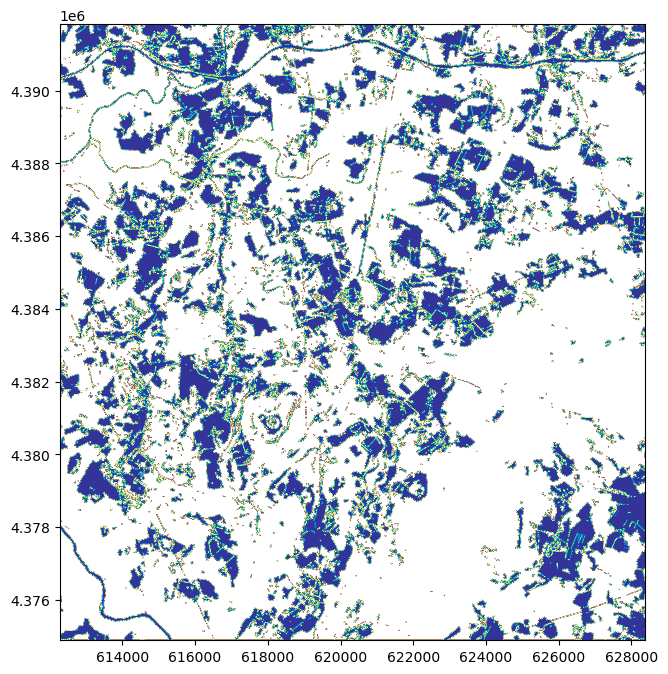

<Axes: >

In [59]:
train = pd.read_csv("data/training.csv")
test = pd.read_csv("data/validation.csv")
src = rasterio.open('./imgs/predictors.tif')
preds = src.read() 

with rasterio.open("imgs/for_mask.tif") as mask_src:
    mask = mask_src.read(1) 

fig=plt.figure(figsize=(8,8))
show(mask,transform=mask_src.transform,cmap = 'terrain')

In [60]:
train = train.drop(columns=['dem_m']);test = test.drop(columns=['dem_m'])

In [61]:
print((train['class'] == 'wet').sum()/ len(train)*100)
print((train['class'] == 'not wet').sum()/ len(train)*100)
print((test['class'] == 'wet').sum()/ len(test)*100)
print((test['class'] == 'not wet').sum()/ len(test)*100)

50.0
0.0
50.0
0.0


In [62]:
unique_vals = np.unique(mask)
unique_vals

array([-2147483648,           1])

In [63]:
mask_clean = np.where(mask == -2147483648, np.nan, mask)

In [64]:
height, width = mask_clean.shape
left, top = mask_src.transform * (0, 0)
right, bottom = mask_src.transform * (width, height)

extent = (left, right, bottom, top)
cmap = ListedColormap(['forestgreen'])

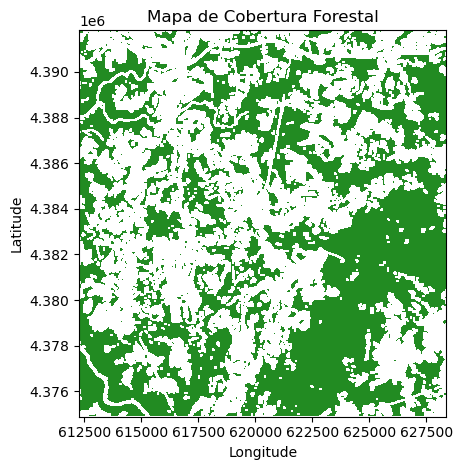

In [65]:
plt.imshow(mask_clean, cmap=cmap, extent=extent)
plt.xlabel('Longitude');plt.ylabel('Latitude')
plt.title('Mapa de Cobertura Forestal')
plt.tight_layout()
plt.show()

## Primero planteamos nuestro modelo logit

$$
\log\left(\frac{P(y_i = 1)}{1 - P(y_i = 1)}\right) = \beta_0 + \beta_1 \cdot \text{cost}_i + \beta_2 \cdot \text{crv\_arc}_i + \beta_3 \cdot \text{crv\_plane}_i + \cdots + \beta_{21} \cdot \text{sp\_a}_i
$$

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      2000 non-null   object 
 1   cost       2000 non-null   float64
 2   ctmi       2000 non-null   float64
 3   crv_arc    2000 non-null   float64
 4   crv_plane  2000 non-null   float64
 5   crv_pro    2000 non-null   float64
 6   diss_10    2000 non-null   float64
 7   diss_20    2000 non-null   float64
 8   diss_25    2000 non-null   float64
 9   diss_5     2000 non-null   float64
 10  diss_a     2000 non-null   float64
 11  rough_10   2000 non-null   float64
 12  rough_20   2000 non-null   float64
 13  rough_25   2000 non-null   float64
 14  rough_5    2000 non-null   float64
 15  rough_a    2000 non-null   float64
 16  slp_d      2000 non-null   float64
 17  sp_10      2000 non-null   float64
 18  sp_20      2000 non-null   float64
 19  sp_25      2000 non-null   float64
 20  sp_5    

In [67]:
X_train = train.drop(columns="class");X_test = test.drop(columns="class")
y_train = train["class"];y_test = test["class"]


In [68]:
feature_names = list(X_train.columns)

In [69]:
logit = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(max_iter=1000, solver="lbfgs"))])

In [70]:
logit.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logit', LogisticRegression(max_iter=1000))])

In [71]:
y_proba = logit.predict_proba(X_test)[:, 1]

AUC Logit: 0.9871


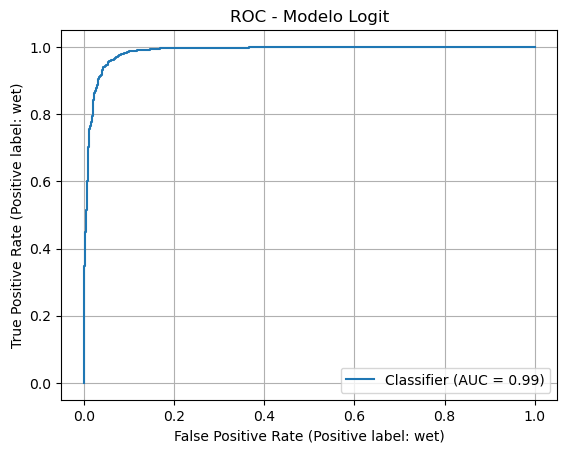

In [72]:
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Logit: {auc:.4f}")
RocCurveDisplay.from_predictions(y_test, y_proba, pos_label="wet")
plt.title("ROC - Modelo Logit")
plt.grid(True)
plt.show()

In [196]:
with rasterio.open("imgs/logit.tif") as src:
    prob_data = src.read(1)
    prob_profile = src.profile

In [197]:
masked_prob = np.where(mask == 1, prob_data, np.nan)

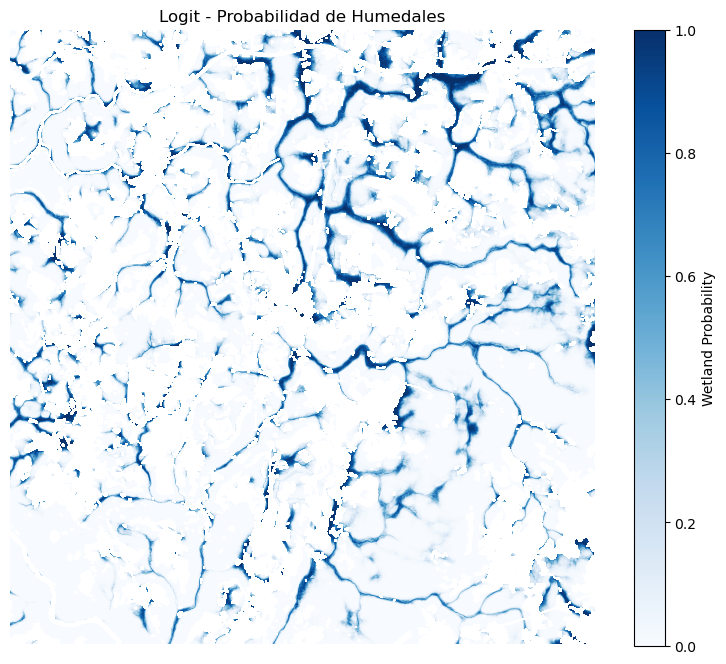

In [198]:
plt.figure(figsize=(10, 8))
cax = plt.imshow(masked_prob, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(cax, label='Wetland Probability')
plt.title("Logit" " - Probabilidad de Humedales")
plt.axis('off')
plt.show()

## Bagging con descicion Tree

Ahora utilizaremos un ensamble para aplicar bagging a un clasificador, 

In [163]:
bagging_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("bagging", BaggingClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators=100,
        random_state=707,
        oob_score=True, 
        n_jobs=1))])

In [164]:
bagging_pipeline.fit(X_train, y_train)

c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   n_estimators=100, n_jobs=1, oob_score=True,
                                   random_state=707))])

In [165]:
y_proba_bagging = bagging_pipeline.predict_proba(X_test)[:, 1]

AUC Bagging: 0.9901


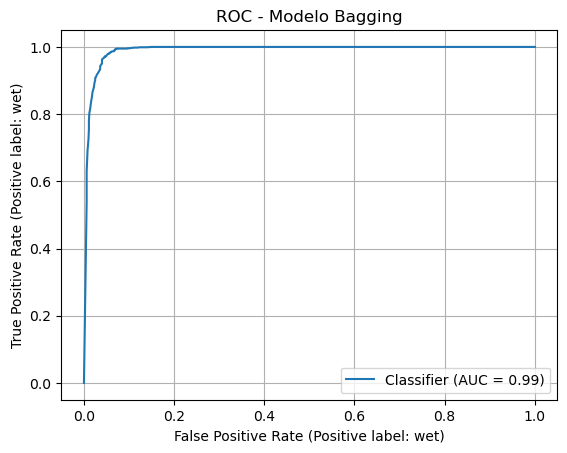

In [143]:
auc_bagging = roc_auc_score(y_test, y_proba_bagging)
print(f"AUC Bagging: {auc_bagging:.4f}")
RocCurveDisplay.from_predictions(y_test, y_proba_bagging, pos_label="wet")
plt.title("ROC - Modelo Bagging")
plt.grid(True)
plt.show()


In [139]:
cv_bagging = cross_val_score(bagging_pipeline, X_train, y_train, scoring='roc_auc', cv=5)
print(f"AUC Bagging (CV 5 folds): {np.mean(cv_bagging):.4f} ± {np.std(cv_bagging):.4f}")

c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AUC Bagging (CV 5 folds): 0.9884 ± 0.0080


In [79]:
y_pred_bagging = bagging_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

         not       0.98      0.95      0.96      1000
         wet       0.95      0.98      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [80]:
classes = ["not", "wet"]

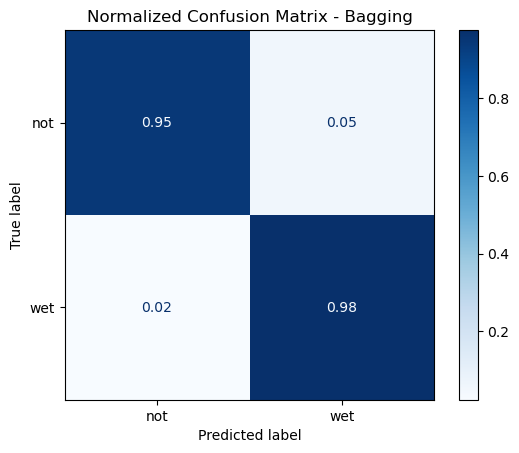

In [81]:
cnf_matrix = confusion_matrix(y_test, y_pred_bagging, normalize='true')
np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")

plt.title('Normalized Confusion Matrix - Bagging')
plt.grid(False)
plt.show()


In [183]:
with rasterio.open("imgs/prob_bagging.tif") as src:
    prob_data = src.read(1)
    prob_profile = src.profile

In [184]:
masked_prob = np.where(mask == 1, prob_data, np.nan)

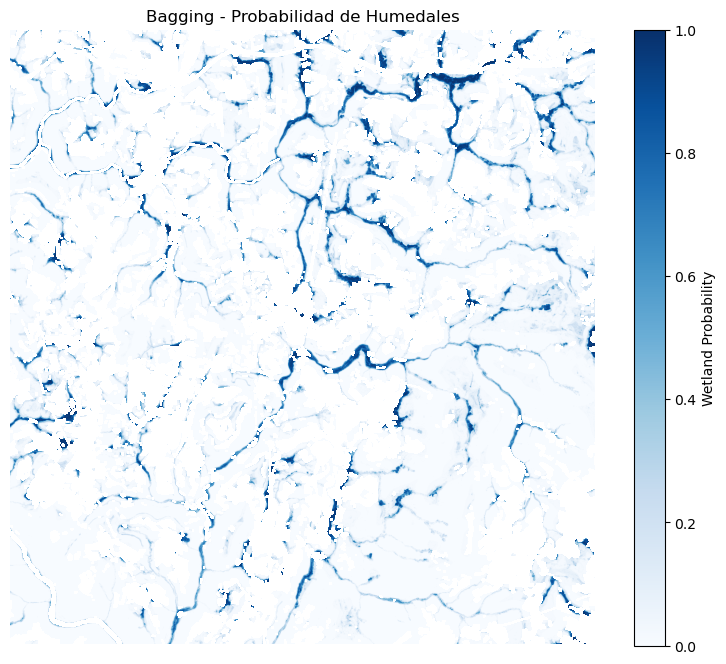

In [186]:
plt.figure(figsize=(10, 8))
cax = plt.imshow(masked_prob, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(cax, label='Wetland Probability')
plt.title("Bagging" " - Probabilidad de Humedales")
plt.axis('off')
plt.show()

## Random Forest

In [82]:
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("rf", RandomForestClassifier(random_state=42))
])

In [83]:
param_dist = {
    'rf__n_estimators': [int(x) for x in np.linspace(200, 2000, 10)],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [int(x) for x in np.linspace(10, 1000, 10)],
    'rf__min_samples_split': [2, 5, 10, 14],
    'rf__min_samples_leaf': [1, 2, 4, 6, 8],
    'rf__criterion': ['entropy', 'gini']
}

In [84]:
random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=707,
    n_jobs=-1
)

In [85]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'rf__criterion': ['entropy', 'gini'],
                                        'rf__max_depth': [10, 120, 230, 340,
                                                          450, 560, 670, 780,
                                                          890, 1000],
                                        'rf__max_features': ['sqrt', 'log2',
                                                             None],
                                        'rf__min_samples_leaf': [1, 2, 4, 6, 8],
                                        'rf__min_samples_split': [2, 5, 10, 14],
                                        'rf__n_estimators': [200, 400, 600, 800,
                                                             1000, 1200, 1400,
                                                             1600, 1800,
                                                             2000]},
                   random_state=707, scoring='accuracy')

In [107]:
best_model_rf = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

In [ ]:
y_pred = best_model_rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

In [88]:
accuracy

0.9625

In [ ]:
y_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"AUC Random Forest: {auc_rf:.4f}")

AUC Random Forest: 0.9908


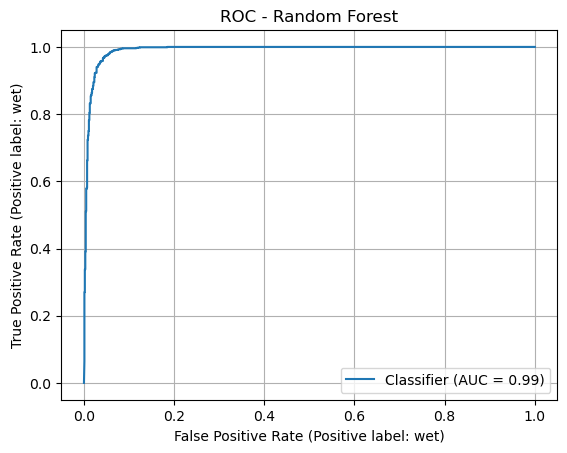

In [90]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf, pos_label="wet")
plt.title("ROC - Random Forest")
plt.grid(True)
plt.show()

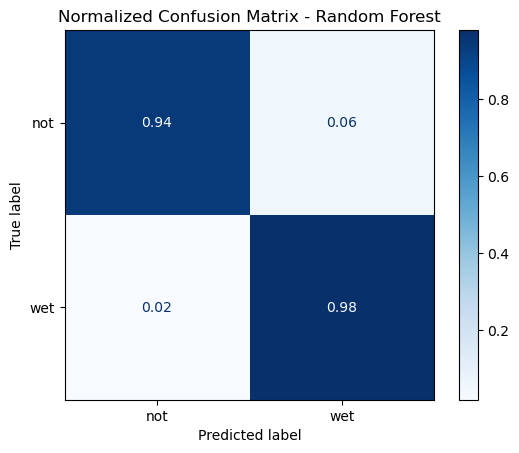

In [ ]:
y_pred_rf = best_model_rf.predict(X_test)
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf, normalize='true')
classes = ["not", "wet"]

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_rf, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

In [ ]:
feature_imp = pd.DataFrame({'importance': best_model_rf.named_steps["rf"].feature_importances_},
                           index = feature_names)
feature_imp = feature_imp.sort_values(by='importance',ascending=False)

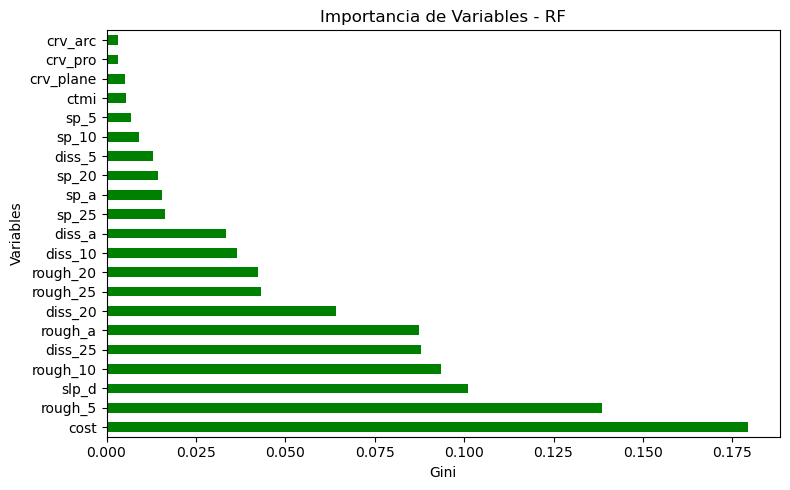

In [93]:
fig, ax = plt.subplots(figsize=(8, 5))
feature_imp.plot(kind="barh", ax=ax, legend=False, color="green")
ax.set_xlabel("Gini");ax.set_ylabel("Variables")
ax.set_title("Importancia de Variables - RF")
plt.tight_layout()
plt.show()

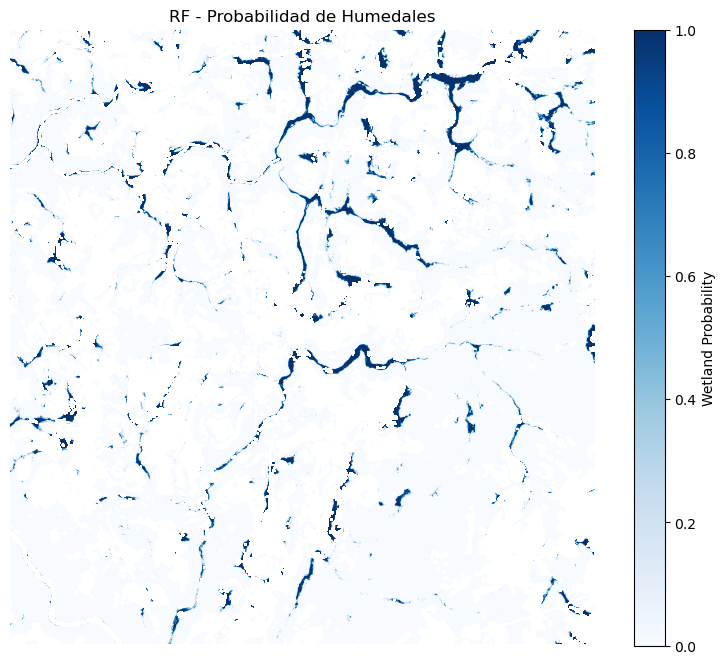

In [124]:
plt.figure(figsize=(10, 8))
cax = plt.imshow(masked_prob, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(cax, label='Wetland Probability')
plt.title("RF - Probabilidad de Humedales")
plt.axis('off')
plt.show()

# Boosting

In [94]:
gb_pipeline = Pipeline([
    ("gb", GradientBoostingClassifier(random_state=42))
])

In [95]:
param_dist = {
    'gb__n_estimators': [int(x) for x in np.linspace(100, 1000, 10)],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 10, 20],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4]
}

In [96]:
random_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_dist,
    n_iter=10, 
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=707,
    n_jobs=-1
)

In [97]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('gb',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__max_depth': [3, 5, 10, 20],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [100, 200, 300, 400,
                                                             500, 600, 700, 800,
                                                             900, 1000]},
                   random_state=707, scoring='roc_auc', verbose=1)

In [98]:
best_model = random_search.best_estimator_

In [99]:
y_pred_boost = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_boost)

In [100]:
y_proba_boost = best_model.predict_proba(X_test)[:, 1]
auc_boost = roc_auc_score(y_test, y_proba_boost)
print(f"AUC Boosting: {auc_boost:.4f}")

AUC Boosting: 0.9887


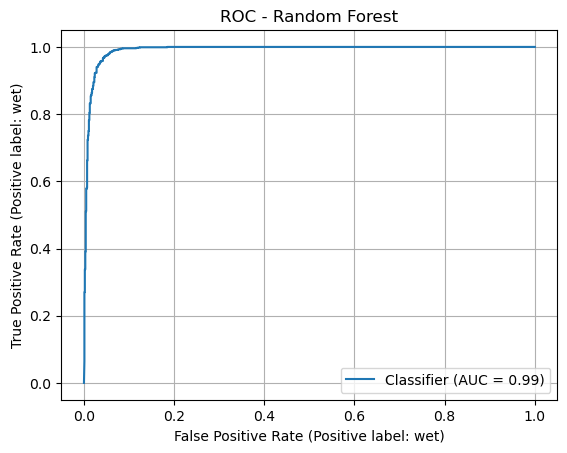

In [101]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf, pos_label="wet")
plt.title("ROC - Random Forest")
plt.grid(True)
plt.show()

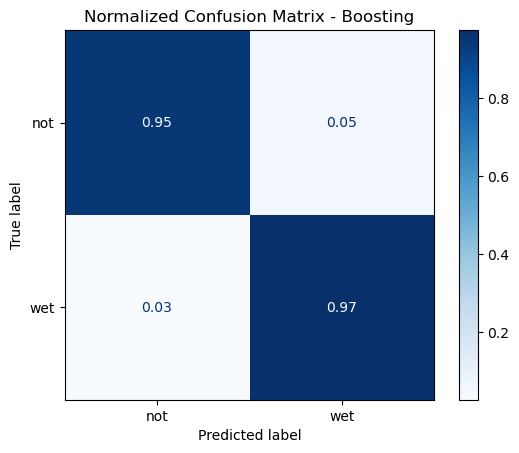

In [102]:
cnf_matrix_boost = confusion_matrix(y_test, y_pred_boost, normalize='true')
classes = ["not", "wet"]

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_boost, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion Matrix - Boosting")
plt.grid(False)
plt.show()

# Raster de resultados

In [103]:
with rasterio.open("imgs/predictors.tif") as src:
    profile = src.profile
    transform = src.transform
    predictors_data = src.read()

In [104]:
n_bands, n_rows, n_cols = predictors_data.shape
X_raster = predictors_data.reshape(n_bands, -1).T

In [105]:
X_raster = np.nan_to_num(X_raster, nan=-9999)

In [106]:
y_proba_raster = best_model.predict_proba(X_raster)[:, 1]
proba_reshaped = y_proba_raster.reshape((n_rows, n_cols))

c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [110]:
profile.update(
    dtype=rasterio.float32,
    count=1,
    compress='lzw'
)


with rasterio.open("imgs/prob_boosting.tif", "w", **profile) as dst:
    dst.write(proba_reshaped.astype(rasterio.float32), 1)

In [111]:
with rasterio.open("imgs/prob_boosting.tif") as src:
    prob_data = src.read(1)
    prob_profile = src.profile

In [112]:
masked_prob = np.where(mask == 1, prob_data, np.nan)

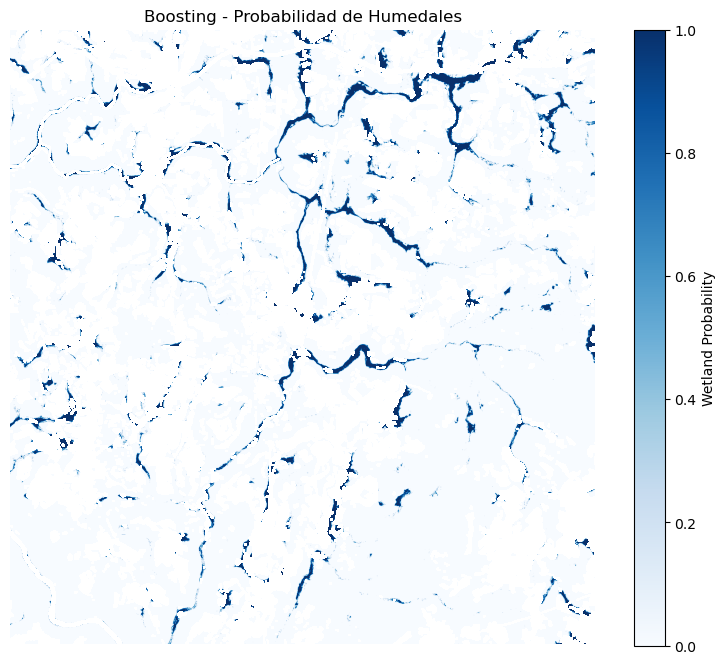

In [114]:
plt.figure(figsize=(10, 8))
cax = plt.imshow(masked_prob, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(cax, label='Wetland Probability')
plt.title("Boosting - Probabilidad de Humedales")
plt.axis('off')
plt.show()

In [108]:
models = [
    ("Logistic Regression", logit),
    ("Bagging", bagging_pipeline),
    ("Random Forest", best_model_rf),
    ("Boosting", best_model),
]

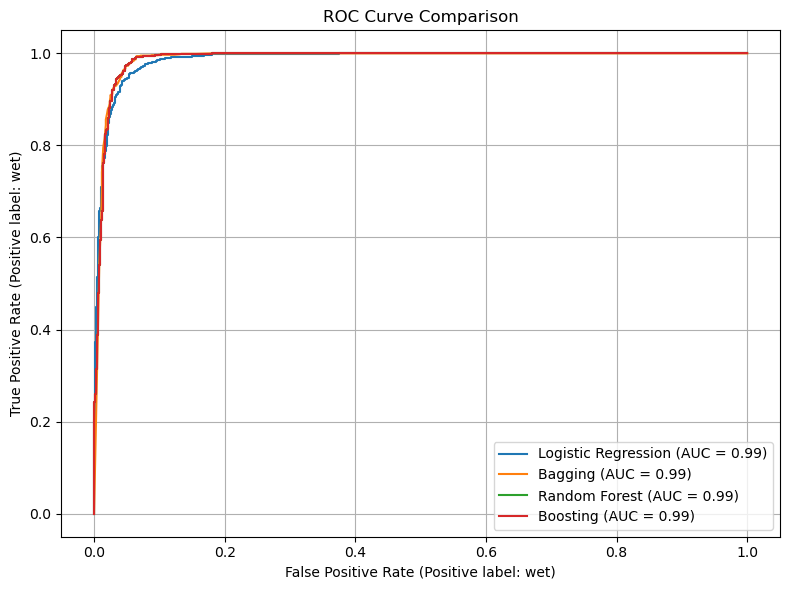

In [109]:
fig, ax = plt.subplots(figsize=(8, 6))

for name, model in models:
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=name)

ax.set_title("ROC Curve Comparison")
ax.grid(True)
plt.tight_layout()
plt.show()

<h2>Mapa Final</h2>

In [202]:
model_rasters = {
    "Logistic Regression": "imgs/logit.tif",
    "Bagging": "imgs/prob_bagging.tif",
    "Random Forest": "imgs/prob_rf.tif",
    "Boosting": "imgs/prob_boosting.tif"
}

In [203]:
model_auc = {}
for name, model in models:
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    model_auc[name] = auc

C:\Users\Diego\AppData\Local\Temp\ipykernel_27100\3800366313.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


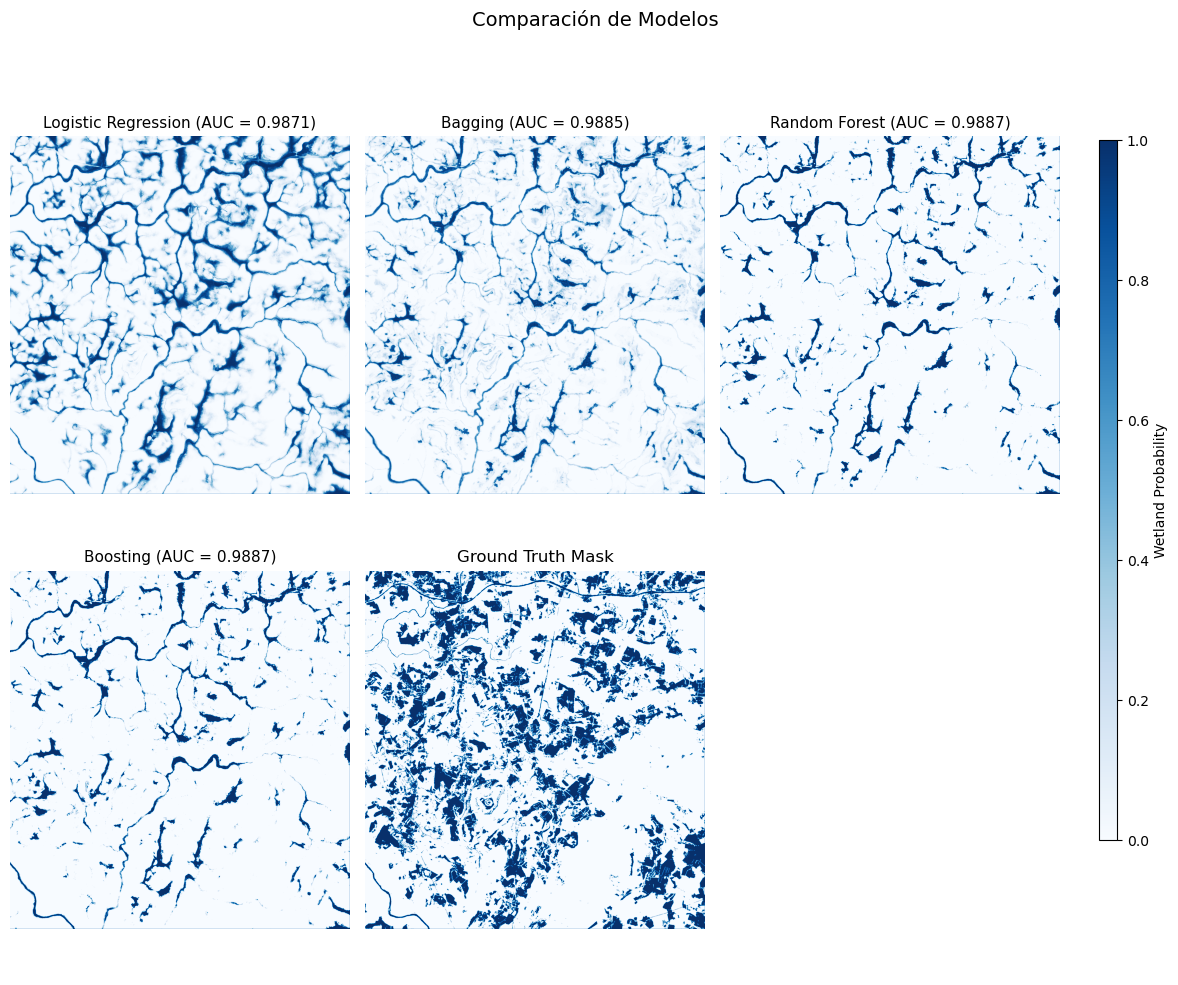

In [213]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

for i, (name, model) in enumerate(models):
    path = model_rasters[name]
    with rasterio.open(path) as src:
        data = src.read(1)

    im = axs[i].imshow(data, cmap='Blues', vmin=0, vmax=1)
    axs[i].set_title(f"{name} (AUC = {model_auc[name]:.4f})", fontsize=11)
    axs[i].axis("off")

axs[4].imshow(mask, cmap='Blues_r')
axs[4].set_title("Ground Truth Mask")
axs[4].axis("off")
axs[5].axis("off")

cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label="Wetland Probability")

plt.suptitle("Comparación de Modelos", fontsize=14)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()